## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Install keras_tuner
!pip install -q -U keras-tuner
import keras_tuner as kt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.1 MB/s eta 0:00:00


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_vc = application_df["APPLICATION_TYPE"].value_counts()
app_type_vc

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
app_cutoff_value = 65

application_types_to_replace = app_type_vc[app_type_vc < app_cutoff_value].index.tolist()

# Inspect application_types_to_replace
application_types_to_replace

['T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [6]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_vc = application_df["CLASSIFICATION"].value_counts()

classification_vc

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_vc[classification_vc > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Assign the set of unique classifications to a variable
classifications = application_df["CLASSIFICATION"].unique().tolist()

# Set the cutoff value to be 100
cutoff_value = 100

# Create a list of classifications to be replaced (values with count < cutoff_value)
classifications_to_replace = classification_vc[classification_vc < cutoff_value].index.tolist()

# Inspect the inverse of classifications_to_replace
classifications_to_replace

['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [10]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [11]:
# Get info on application_df
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [12]:
# Select all categorical fields using select_dtypes
categorical_fields = application_df.select_dtypes(include=['object']).columns.tolist()

# Inspect result
categorical_fields

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df, columns=categorical_fields)

# Inspect encoded df
application_df_encoded


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
application_df_encoded.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [19]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL', 'STATUS'])
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
X.columns

Index(['ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1270', 'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C2700', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C4000', 'CLASSIFICATION_C5000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Co

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
# Use a Random Forest model to determine feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

# Create feature importance dataframe to analyze etc.
fi_values = rf.feature_importances_
features = X.columns

# Create df
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})

feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)

feature_importance_df


,feature,feature_importance
0,ASK_AMT,0.395596
12,AFFILIATION_CompanySponsored,0.130894
14,AFFILIATION_Independent,0.129415
7,APPLICATION_TYPE_T5,0.031557
2,APPLICATION_TYPE_T10,0.024972
35,ORGANIZATION_Association,0.022539
38,ORGANIZATION_Trust,0.021436
22,CLASSIFICATION_C2000,0.017633
4,APPLICATION_TYPE_T19,0.016405
23,CLASSIFICATION_C2100,0.016279


In [55]:
# Get summary statistics for feature_importances
feature_importance_df.describe()

,feature_importance
count,50.000000
mean,0.020000
std,0.059850
min,0.000033
25%,0.001303
50%,0.005114
75%,0.012676
max,0.395596


In [58]:
# Set cutoff value to 50% percentile of feature_importance distribution (.005114)

important_features = feature_importance_df.loc[feature_importance_df["feature_importance"] >= .005114, "feature"].tolist()

important_features

['ASK_AMT',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Independent',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T10',
 'ORGANIZATION_Association',
 'ORGANIZATION_Trust',
 'CLASSIFICATION_C2000',
 'APPLICATION_TYPE_T19',
 'CLASSIFICATION_C2100',
 'APPLICATION_TYPE_T3',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C7000',
 'APPLICATION_TYPE_T4',
 'USE_CASE_ProductDev',
 'APPLICATION_TYPE_T6',
 'USE_CASE_Preservation',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C3000',
 'INCOME_AMT_0',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_1-9999',
 'CLASSIFICATION_Other']

In [61]:
# Define a refined subset of feature training and test sets with important_features
X2_train = X_train[important_features]

X2_test = X_test[important_features]

# Inspect info
X2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25724 entries, 30531 to 16854
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   ASK_AMT                       25724 non-null  int64
 1   AFFILIATION_CompanySponsored  25724 non-null  uint8
 2   AFFILIATION_Independent       25724 non-null  uint8
 3   APPLICATION_TYPE_T5           25724 non-null  uint8
 4   APPLICATION_TYPE_T10          25724 non-null  uint8
 5   ORGANIZATION_Association      25724 non-null  uint8
 6   ORGANIZATION_Trust            25724 non-null  uint8
 7   CLASSIFICATION_C2000          25724 non-null  uint8
 8   APPLICATION_TYPE_T19          25724 non-null  uint8
 9   CLASSIFICATION_C2100          25724 non-null  uint8
 10  APPLICATION_TYPE_T3           25724 non-null  uint8
 11  CLASSIFICATION_C1000          25724 non-null  uint8
 12  CLASSIFICATION_C7000          25724 non-null  uint8
 13  APPLICATION_TYPE_T4        

In [63]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X2_train)

# Scale the data
X2_train_scaled = X_scaler.transform(X2_train)
X2_test_scaled = X_scaler.transform(X2_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Regularization punishes the model for "screwing up"
# L1 - serves to limit features
# L2 - never reaches zero (at least going to be 1 feature)
# C - regularization used to deal with loss function of model

In [65]:
### First Version (pre feature importance evaluation)

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_l1 = 80
hidden_nodes_l2 = 40
hidden_nodes_l3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l1, activation="relu", input_dim=number_input_features))

# Add dropout layer
nn.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l2, activation="relu"))

# Third layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                4080      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_13 (Dense)            (None, 40)                3240      
                                                                 
 dense_14 (Dense)            (None, 10)                410       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=75)

Epoch 1/75
804/804 [==============================] - 2s 1ms/step - loss: 0.5809 - accuracy: 0.7135
Epoch 2/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5603 - accuracy: 0.7276
Epoch 3/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7285
Epoch 4/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7315
Epoch 5/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7314
Epoch 6/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7326
Epoch 7/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7322
Epoch 8/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7320
Epoch 9/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7336
Epoch 10/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7335

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5489 - accuracy: 0.7277 - 328ms/epoch - 1ms/step
Loss: 0.548885703086853, Accuracy: 0.7276967763900757


In [ ]:
### Version 2 - post feature selection

In [85]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X2_train_scaled[0])
hidden_nodes_l1 = 110
hidden_nodes_l2 = 80
hidden_nodes_l3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l1, activation="relu", input_dim=number_input_features))

# Add dropout layer
nn.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l2, activation="relu"))

# Add dropout layer
nn.add(tf.keras.layers.Dropout(.5))

# Third layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l3, activation="relu"))

# Add dropout layer
nn.add(tf.keras.layers.Dropout(.25))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 110)               2860      
                                                                 
 dropout_5 (Dropout)         (None, 110)               0         
                                                                 
 dense_34 (Dense)            (None, 80)                8880      
                                                                 
 dropout_6 (Dropout)         (None, 80)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                810       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                

In [86]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [87]:
# Train the model
fit_model = nn.fit(X2_train_scaled,y_train,epochs=75)

Epoch 1/75
804/804 [==============================] - 2s 2ms/step - loss: 0.6100 - accuracy: 0.6945
Epoch 2/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.7207
Epoch 3/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5752 - accuracy: 0.7241
Epoch 4/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5739 - accuracy: 0.7212
Epoch 5/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5696 - accuracy: 0.7251
Epoch 6/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7261
Epoch 7/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5683 - accuracy: 0.7256
Epoch 8/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.7273
Epoch 9/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.7285
Epoch 10/75
804/804 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.7269

In [84]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X2_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5512 - accuracy: 0.7279 - 316ms/epoch - 1ms/step
Loss: 0.5511507391929626, Accuracy: 0.7279300093650818


In [ ]:
### Section III:

In [89]:
# Define number of input features (same as above)
number_input_features = len(X2_train_scaled[0])

# Create a method that creates a new Sequential model with hyperparameter tuning
def create_model(hp):
  nn_model = tf.keras.models.Sequential()

  # Allow kerastuner to decide which activation function to use in hidden layers
  activation = hp.Choice('activation', ['relu', 'tanh'])

  # Allow kerastuner to decide number of neurons in first layer
  nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value=1,
                                                  max_value=100,
                                                  step=5),
                                     activation=activation, input_dim=number_input_features))
  # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
  for i in range(hp.Int('num_layers', 1, 5)):
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                    min_value=1,
                                                    max_value=40,
                                                    step=5),
                                       activation=activation))

  nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

  # Compile the model
  nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

  return nn_model

In [90]:
# Create Hyperband tuner with kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [91]:
# Run the kerastuner search for best hyperparameters
tuner.search(X2_train_scaled,y_train,epochs=75,validation_data=(X2_test_scaled,y_test))

Trial 60 Complete [00h 00m 32s]
val_accuracy: 0.7243148684501648

Best val_accuracy So Far: 0.727580189704895
Total elapsed time: 00h 14m 49s


In [92]:
 # Get top 3 model hyperparameters and print the values
a = tuner.get_best_hyperparameters(3)
for param in a:
  print(param.values)

{'activation': 'relu', 'first_units': 81, 'num_layers': 4, 'units_0': 31, 'units_1': 26, 'units_2': 21, 'units_3': 11, 'units_4': 6, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0045'}
{'activation': 'tanh', 'first_units': 81, 'num_layers': 5, 'units_0': 6, 'units_1': 6, 'units_2': 11, 'units_3': 11, 'units_4': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 61, 'num_layers': 4, 'units_0': 16, 'units_1': 6, 'units_2': 11, 'units_3': 21, 'units_4': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0023'}


In [93]:
# Get best hyperparameters
best_hyper = tuner.get_best_hyperparameters(2)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 81,
 'num_layers': 4,
 'units_0': 31,
 'units_1': 26,
 'units_2': 21,
 'units_3': 11,
 'units_4': 6,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0045'}

In [94]:
# Get the best model from the tuner
best_model = tuner.get_best_models(1)[0]

# Evaluate the best model against the test dataset
loss, accuracy = best_model.evaluate(X2_test_scaled, y_test)

print(f"Loss: {loss}, Accuracy: {accuracy}")

268/268 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7276
Loss: 0.5501141548156738, Accuracy: 0.727580189704895


In [ ]:
# Export our model to HDF5 file
from keras.models import save_model

best_model.save("AlphabetSoupModel.keras")

In [ ]:
### Keep NAME

In [120]:
# Read in application df
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

# Add the NAME column to features
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"], axis=1)

In [121]:
# Look at APPLICATION_TYPE value counts for binning
app_type_vc = application_df["APPLICATION_TYPE"].value_counts()
app_type_vc

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [122]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
app_cutoff_value = 65

application_types_to_replace = app_type_vc[app_type_vc < app_cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

In [123]:
# Look at CLASSIFICATION value counts for binning
classification_vc = application_df["CLASSIFICATION"].value_counts()

classification_vc

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

(-10.0, 10.0)

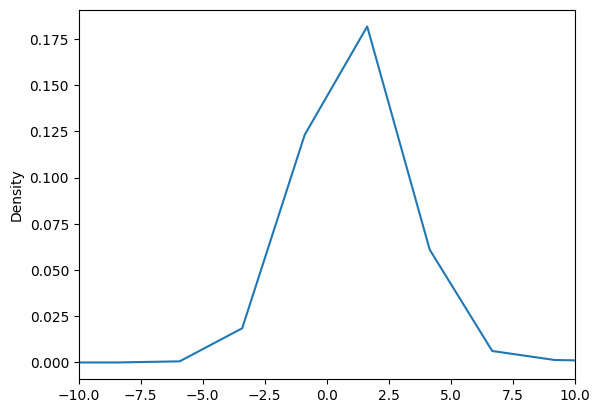

In [124]:
import matplotlib.pyplot as plt

# Inspect NAME column
app_name_vc = application_df.NAME.value_counts()

app_name_vc.plot.density()

plt.xlim(left=-10, right=10)

In [125]:
# Find out how many names occur more than 50 times
common_names = app_name_vc[app_name_vc >= 50]

print(common_names)
print(f"There are {common_names.count()} that appear 50 or more times in the dataset.")

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [126]:
# Replace NAME of observations with less than 50 count with "Other"
names_to_replace = app_name_vc[app_name_vc < 50].index

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

In [127]:
application_df["NAME"].value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [128]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)

In [129]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL', 'STATUS'])
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [131]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_l1 = 80
hidden_nodes_l2 = 40
hidden_nodes_l3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l1, activation="relu", input_dim=number_input_features))

# # Add dropout layer
# nn.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l2, activation="relu"))

# Third layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                12960     
                                                                 
 dense_11 (Dense)            (None, 40)                3240      
                                                                 
 dense_12 (Dense)            (None, 10)                410       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 16,621
Trainable params: 16,621
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=75)

Epoch 1/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5032 - accuracy: 0.7524
Epoch 2/75
804/804 [==============================] - 1s 2ms/step - loss: 0.4777 - accuracy: 0.7650
Epoch 3/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4746 - accuracy: 0.7669
Epoch 4/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4721 - accuracy: 0.7695
Epoch 5/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4704 - accuracy: 0.7700
Epoch 6/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4692 - accuracy: 0.7702
Epoch 7/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4687 - accuracy: 0.7697
Epoch 8/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4671 - accuracy: 0.7718
Epoch 9/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4666 - accuracy: 0.7711
Epoch 10/75
804/804 [==============================] - 1s 1ms/step - loss: 0.4654 - accuracy: 0.7712

In [133]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5004 - accuracy: 0.7643 - 459ms/epoch - 2ms/step
Loss: 0.5003796815872192, Accuracy: 0.7643148899078369


In [ ]:
# Woo! 76.43% Accuracy!